In [1]:
# Import myfunc at cix folder
%matplotlib inline
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, '../cix')

import myfuncs as mf

import pandas as pd

from rdkit import rdBase
rdBase.DisableLog('rdApp.*') # To make rdkit silent

from rdkit.Chem import PandasTools as pt

from rdkit.Chem import Descriptors

The purpose of this script is to analyze the output of the CMD trained with a diverse set of 300K dissimilar ("orthogonal") compounds as created by the divsamp0 function and compare it with the output of the CMD trained with a random set of 300K compounds. As source of compounds, the set of ca. 5 million clean lead-like compounds from ZINC12 is used. From it, a collection of 300K orthogonal molecules were previously sampled by means of divsamp0 (see Exp4DivSamp script). 

The correctness, diversity and novelty of the output obtained with the orthogonal training set is compared with the output of the random training set. The correctness of the training and output files is assessed by the percentage of correct SMILES. The diversity of the training and output files are assessed by counting the number of clusters, frames and generic frames in both sets. The novelty of the training set is assessed by the percentage of molecules with a Tanimoto similarity < 0.7 to any molecule in the training set, and the percentage of frames or generic frames not present in the training set.

In an initial step, the orthogonality of the orthogonal set is checked. 

In [ ]:
##########################################
## Check orthogonality of input smiles
##########################################



In [2]:
##########################################
## Diversity analysis of input smiles
##########################################

# Prepare the dataset
smis = mf.smif2smis('./div0le.smi')
ncorr, n, smis, wrongsmis = mf.corrsmis(smis)
smidft = mf.smis2smidf(smis)
del smis

# Percentage of correct smiles
pd.DataFrame({"Initial n": n, "Percentage of Correct SMILES": [str(ncorr/float(n)*100)+"%"]})

,Initial n,Percentage of Correct SMILES
0,300000,100.0%


In [3]:
# Diversity analysis
clb, fs, fg = mf.divan(smidft, OnlyBu = True)

Clustering time: 00:12:49
Diversity analysis time: 00:26:59


In [4]:
# Results
pd.DataFrame({"Number of Clusters": [len(clb)], "Number of Frames": [len(fs)], "Number of Generic Frames": [len(fg)]})

,Number of Clusters,Number of Frames,Number of Generic Frames
0,194526,161518,271997


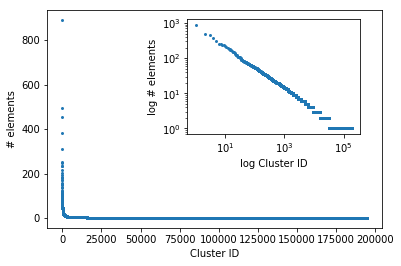

In [5]:
# Plot clusters distribution
d = pd.DataFrame({'clid':range(1, len(clb)+1), 'n':map(len, clb)})
mf.plotclus(d, "Cluster ID", "# elements", "log Cluster ID", "log # elements")

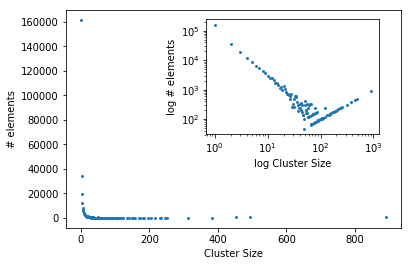

In [6]:
# Plot neighbor size distribution
d2 = pd.DataFrame({"clsize":d.n.groupby(d.n).unique(), "n":d.n.groupby(d.n).sum()})
mf.plotclus(d2, "Cluster Size", "# elements", "log Cluster Size", "log # elements")

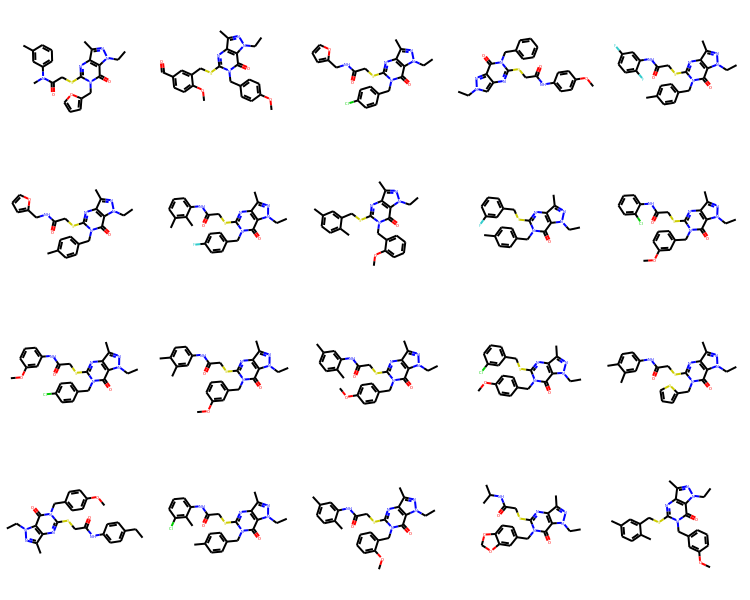

In [7]:
# Paint some random cluster to check everythings is fine
mf.paintmols(smidft['smiles'].loc[smidft.id.isin(clb[556])])

In [8]:
##########################################
## Diversity analysis of output unc smiles
##########################################

# Prepare the dataset
smis = mf.smif2smis('./unc300000.smi')
ncorr, n, smis, wrongsmis = mf.corrsmis(smis)
smidfu = mf.smis2smidf(smis)
del smis

# Percentage of correct smiles
pd.DataFrame({"Initial n": n, "Percentage of Correct SMILES": [str(ncorr/float(n)*100)+"%"]})

,Initial n,Percentage of Correct SMILES
0,5000,99.12%


In [9]:
# Diversity analysis
clb, fs, fg = mf.divan(smidfu, OnlyBu = True)

# Results
pd.DataFrame({"Number of Clusters": [len(clb)], "Number of Frames": [len(fs)], "Number of Generic Frames": [len(fg)]})

Clustering time: 00:00:10
Diversity analysis time: 00:00:27


,Number of Clusters,Number of Frames,Number of Generic Frames
0,1061,859,1807


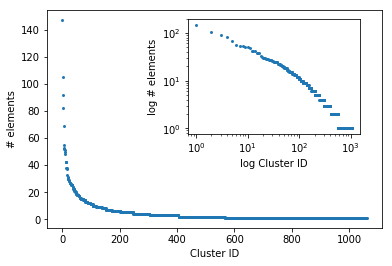

In [10]:
# Plot clusters distribution
d = pd.DataFrame({'clid':range(1, len(clb)+1), 'n':map(len, clb)})
mf.plotclus(d, "Cluster ID", "# elements", "log Cluster ID", "log # elements")

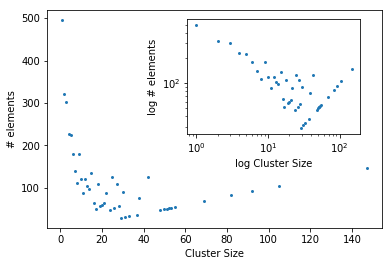

In [11]:
# Plot neighbor size distribution
d2 = pd.DataFrame({"clsize":d.n.groupby(d.n).unique(), "n":d.n.groupby(d.n).sum()})
mf.plotclus(d2, "Cluster Size", "# elements", "log Cluster Size", "log # elements")

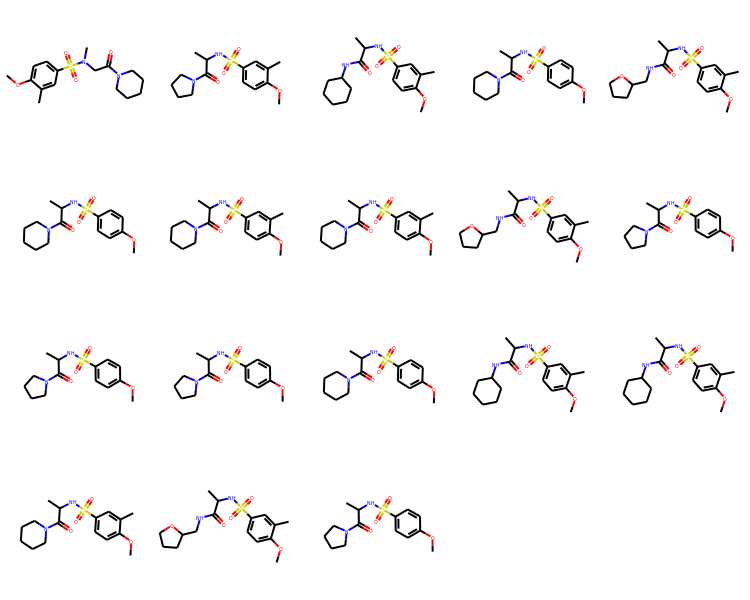

In [12]:
# Paint some random cluster to check everythings is fine
mf.paintmols(smidfu['smiles'].loc[smidfu.id.isin(clb[55])])

In [13]:
##########################################
## Diversity analysis of output con smiles
##########################################

# Prepare the dataset
smis = mf.smif2smis('./con300000.smi')
ncorr, n, smis, wrongsmis = mf.corrsmis(smis)
smidfc = mf.smis2smidf(smis)
del smis

# Percentage of correct smiles
pd.DataFrame({"Initial n": n, "Percentage of Correct SMILES": [str(ncorr/float(n)*100)+"%"]})

,Initial n,Percentage of Correct SMILES
0,5000,100.0%


In [14]:
# Diversity analysis
clb, fs, fg = mf.divan(smidfc, OnlyBu = True)

# Results
pd.DataFrame({"Number of Clusters": [len(clb)], "Number of Frames": [len(fs)], "Number of Generic Frames": [len(fg)]})

Clustering time: 00:00:07
Diversity analysis time: 00:00:19


,Number of Clusters,Number of Frames,Number of Generic Frames
0,492,294,521


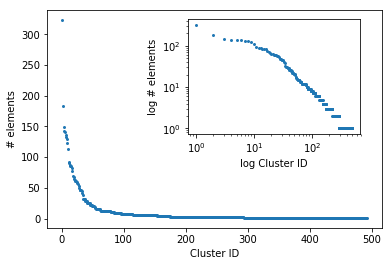

In [15]:
# Plot clusters distribution
d = pd.DataFrame({'clid':range(1, len(clb)+1), 'n':map(len, clb)})
mf.plotclus(d, "Cluster ID", "# elements", "log Cluster ID", "log # elements")

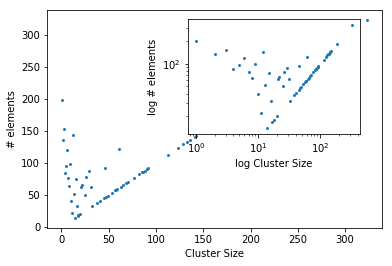

In [16]:
# Plot neighbor size distribution
d2 = pd.DataFrame({"clsize":d.n.groupby(d.n).unique(), "n":d.n.groupby(d.n).sum()})
mf.plotclus(d2, "Cluster Size", "# elements", "log Cluster Size", "log # elements")

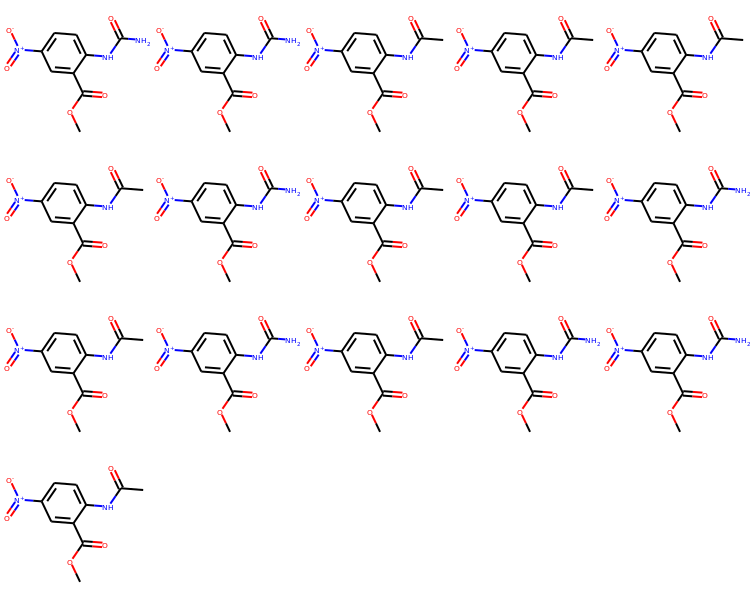

In [17]:
# Paint some random cluster to check everythings is fine
mf.paintmols(smidfc['smiles'].loc[smidfc.id.isin(clb[55])])

Text(0.5,0,'MolWt')

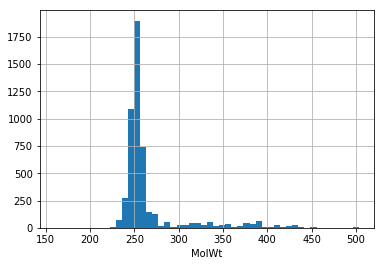

In [18]:
# Paint the histogram of property
pt.AddMoleculeColumnToFrame(smidfc,"smiles")
smidfc['mw'] = smidfc['ROMol'].map(Descriptors.MolWt)
del smidfc["ROMol"]
ax = smidfc['mw'].hist(bins = 50)
ax.set_xlabel("MolWt")

In [21]:
##########################################
## Novelty analysis of uncond smiles
##########################################

news, fraq, newfraqs, gfraq, newgfraqs = mf.novan(smidfu, smidft, th = 0.7)

Arenas creation time: 00:10:45
Novelty analysis time: 00:24:57


In [101]:
dic = {"# mols":[5000], "new structures(%)":[round(100*len(news)/5000.,2)],\
       "# frames":[len(fraq)], "new frames(%)": [round(100*len(newfraqs)/float(len(fraq)),2)],\
       "# gen frames":[len(gfraq)], "new gen frames(%)": [round(100*len(newgfraqs)/float(len(gfraq)),2)]}
pd.DataFrame(dic, columns = ["# mols", "new structures(%)", "# frames", "new frames(%)", "# gen frames", "new gen frames(%)"])

,# mols,new structures(%),# frames,new frames(%),# gen frames,new gen frames(%)
0,5000,5.36,859,32.36,1807,73.27


NameError: name 'news' is not defined